# MNIST DATASET

The problem statement is to get the dataset from MNIST website or Kaggle and Create a neural network and label the images accordingly

The model is being created from scratch

First we will start by importing basic libraries required :


In [3]:
import math
import numpy as np
import pandas as pd
import tensorflow
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt

tf.disable_v2_behavior()

%matplotlib inline
np.random.seed(1)

Instructions for updating:
non-resource variables are not supported in the long term


# Loading the data


In [4]:
Raw_train = pd.read_csv ('C:\\Users\\rohan\\coursera-dl\\mnist_train.csv')
Raw_test = pd.read_csv ('C:\\Users\\rohan\\coursera-dl\\mnist_test.csv')

#Separating Images and label
Y_train_orig = Raw_train['label']
X_train_orig = Raw_train.drop('label', axis = 1)
Y_test_orig = Raw_test['label']
X_test_orig = Raw_test.drop('label', axis = 1)


#Deleting extra variables after separation
del Raw_train, Raw_test

# One Hot Matrix

In [185]:
def one_hot_matrix(labels, C):

    C = tf.constant(C,name='C')
    
    one_hot_matrix = tf.one_hot(labels, C, axis = 0)
    
    sess = tf.Session()
    one_hot = sess.run(one_hot_matrix)
    
    sess.close()
    
   
    
    return one_hot

# Getting data in shape

In [186]:
print("Number of training examples:",len(X_train_orig))
print("Number of test examples:", len(X_test_orig))
X_train = X_train_orig.to_numpy().T
X_test = X_test_orig.to_numpy().T

Y_train = Y_train_orig.to_numpy()
Y_test = Y_test_orig.to_numpy()

print(X_train.shape)
print(X_test.shape)

#Y_train_onehot = tf.transpose(tf.one_hot(Y_train, 10))
#Y_test_onehot = tf.transpose(tf.one_hot(Y_test, 10))

Y_train = one_hot_matrix(Y_train_orig,10)
Y_test = one_hot_matrix(Y_test_orig,10)

print(Y_train.shape)
print(Y_test.shape)

Number of training examples: 60000
Number of test examples: 10000
(784, 60000)
(784, 10000)
(10, 60000)
(10, 10000)


y = 0


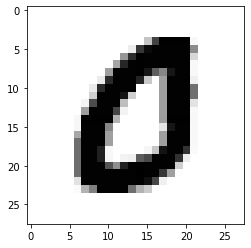

In [187]:
ind = np.random.randint(0,60000)
plt.imshow(X_train[:,ind].reshape(28,28), cmap = 'Greys')
print("y =",np.squeeze(np.where(Y_train[:,ind] == 1)))

# Data processing


In [188]:
# Normalising
X_train =X_train/255
X_test = X_test/255

# Creating Model

Creating a Deep Neural network with 3 layers with 128, 256, 512 hidden units within 3 layers.
Lets start with defining function for all forward and backward propagation and create a model using them.

## Common variables which will be used

In [189]:
(n_x, m) = X_train.shape
n_y = 10
layer_dim =[n_x, 128, 256, 512, n_y]             
print(n_x,n_y)

784 10


# Placeholder


In [190]:
def create_placeholders(n_x, n_y):
   
    X = tf.placeholder(tf.float32,[n_x, None] ,name = 'X')
    Y = tf.placeholder(tf.float32,[n_y, None],name = 'Y')
    
    return X, Y

### Mini batch creator


In [191]:
def random_mini_batches(X,Y,mini_batch_size):
    
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    
   # permutation = list(np.random.permutation(m))
   # shuffled_X = X[:, permutation]
    #shuffled_Y = Y[:, permutation].reshape(10,m)
    
    num_complete_minibatches = math.floor(m/mini_batch_size) 
    
    for k in range(0, num_complete_minibatches):
       
        mini_batch_X = X[ :, k*mini_batch_size : (k+1)*mini_batch_size]
        mini_batch_Y = Y[ :, k*mini_batch_size : (k+1)*mini_batch_size]
      
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
   
    if m % mini_batch_size != 0:
        
        mini_batch_X = X[:,num_complete_minibatches * mini_batch_size:]
        mini_batch_Y = Y[:,num_complete_minibatches * mini_batch_size:]
        
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

# Intialization

In [192]:
def init_parameters():
        
 #   (n_x,l1,l2,l3,n_y) = (784, 128, 256, 512, 10)
    
    tf.set_random_seed(1) 
    
    W1 = tf.get_variable("W1", [128,784], initializer = tf.initializers.he_normal())
    b1 = tf.get_variable("b1", [128,1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [256,128], initializer = tf.initializers.he_normal())
    b2 = tf.get_variable("b2", [256,1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [512,256], initializer = tf.initializers.he_normal())
    b3 = tf.get_variable("b3", [512,1], initializer = tf.zeros_initializer())
    W4 = tf.get_variable("W4", [10,512], initializer = tf.initializers.he_normal())
    b4 = tf.get_variable("b4", [10,1], initializer = tf.zeros_initializer())   
         
    parameters = {   'W1':W1,
                     'W2':W2,
                     'W3':W3,
                     'W4':W4,
                     'b1':b1,
                     'b2':b2,
                     'b3':b3,
                     'b4':b4}
    
    return parameters

# Forward propagartion


In [193]:
def forward_propagation(X , parameters):
  
    #Getting values
    W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters['W3']
    W4 = parameters['W4']
    b1 = parameters['b1']
    b2 = parameters['b2']
    b3 = parameters['b3']
    b4 = parameters['b4']
    
    Z1 = tf.add(tf.matmul(W1,X),b1)                   # A = relu(W.T*X+b)
    A1 = tf.nn.relu(Z1)
    
    Z2 = tf.add(tf.matmul(W2,A1),b2)
    A2 = tf.nn.relu(Z2)
    
    Z3 = tf.add(tf.matmul(W3,A2),b3)
    A3 = tf.nn.relu(Z3)
    
    Z4 = tf.add(tf.matmul(W4,A3),b4)
    
    return Z4
    

# Cost Function


In [194]:
def compute_cost(Z4, Y, cost_type):
    
    if (cost_type == "softmax_cross_entropy"):
        
        logits = tf.transpose(Z4)
        labels = tf.transpose(Y)
        cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))
        
    elif(cost_type == "sigmoid_cross_entropy"):
        
        logits = tf.transpose(tf.nn.softmax(Z4))
        labels = tf.transpose(Y)
        cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=labels, logits=logits))
        
    return cost



# Building a Model


In [195]:
def model(X_train, Y_train, alpha, cost_type, optim, num_epochs, minibatch_size = 1000, print_cost = True):
    
    
    (n_x, m) = X_train.shape
    (n_y, m) = Y_train.shape
    layer_dim = [n_x, 128, 256, 512, n_y]
    costs = []                                        # To store all cost for learning curve
    
    tf.set_random_seed(1)

    X, Y = create_placeholders(n_x, n_y)
    
    parameters = init_parameters()
    Z4 = forward_propagation(X, parameters)
    cost = compute_cost(Z4,Y,cost_type)
    
    if optim == 'adam':
        optimizer = tf.train.AdamOptimizer(learning_rate = alpha).minimize(cost)
    elif optim == 'gradientdescent':
        optimizer = tf.train.GradientDescentOptimizer(learning_rate = alpha).minimize(cost)
    elif optim == 'momentum':
        optimizer = tf.train.MomentumOptimizer(learning_rate = alpha, momentum = 0.99).minimize(cost)
        
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        sess.run(init)
        
        for epoch in range(num_epochs):
            
                    epoch_cost = 0.
                    num_minibatch = m / minibatch_size
                    minibatches = random_mini_batches(X_train, Y_train, minibatch_size)
                    
                    for minibatch in minibatches:
                                   
                        (minibatch_X, minibatch_Y) = minibatch
                        c,minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y}) 
                        epoch_cost = epoch_cost + ( minibatch_cost / minibatch_size )
                        
                    if print_cost == True and epoch % 10 == 0:
                        print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
                    if print_cost == True and epoch % 2 == 0:
                         costs.append(epoch_cost)
                            
                            
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per twos)')
        plt.title("Learning rate =" + str(alpha))
        plt.show() 
        
        
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")
        
        correct_prediction = tf.equal(tf.argmax(Z4), tf.argmax(Y))
       
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print("\n\n") 
        
        return parameters
            

### Predict function

In [196]:
def predict(X_test, Y_test, parameters):
    
    n_x = X_test.shape[0]
    n_y = Y_test.shape[0]
    
    X, Y = create_placeholders(n_x, n_y)
    
    init = tf.global_variables_initializer()
    
    Z = forward_propagation(X, parameters)
    
    with tf.Session() as sess:
        sess.run(init)
        
        Y_pred = tf.argmax(Z)
        
        correct_prediction = tf.equal(Y_pred, tf.argmax(Y))
        
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Test Accuracy:", accuracy.eval({X : X_test,Y : Y_test}) )
        
        y_pred = sess.run(Y_pred, feed_dict={X: X_test})
        
    return y_pred

The model has been created.

Lets tune the hyperparameters used in the model.
Since the train set does not have very huge training data (>1,00,000), the whole train set will be used for the cross validaton.

For alpha = 0.0001
Cost after epoch 0: 0.112025
Cost after epoch 10: 0.010157
Cost after epoch 20: 0.005243
Cost after epoch 30: 0.003006
Cost after epoch 40: 0.001750


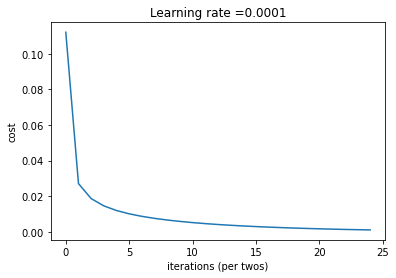

Parameters have been trained!
Train Accuracy: 0.99701667



For alpha = 0.0003
Cost after epoch 0: 0.063996
Cost after epoch 10: 0.003876
Cost after epoch 20: 0.001291
Cost after epoch 30: 0.000443
Cost after epoch 40: 0.000181


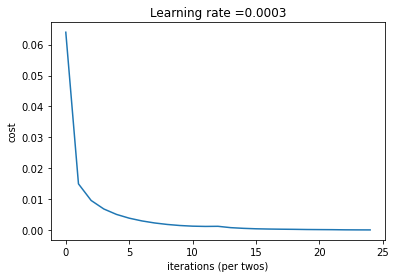

Parameters have been trained!
Train Accuracy: 0.9999833



For alpha = 0.001
Cost after epoch 0: 0.044167
Cost after epoch 10: 0.001175
Cost after epoch 20: 0.000189
Cost after epoch 30: 0.000016
Cost after epoch 40: 0.000008


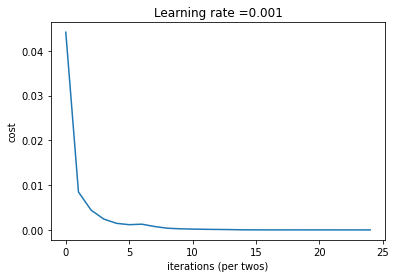

Parameters have been trained!
Train Accuracy: 1.0



For alpha = 0.003
Cost after epoch 0: 0.048777
Cost after epoch 10: 0.001254
Cost after epoch 20: 0.000487
Cost after epoch 30: 0.000875
Cost after epoch 40: 0.000790


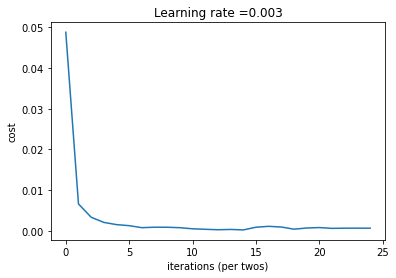

Parameters have been trained!
Train Accuracy: 0.9982



For alpha = 0.1
Cost after epoch 0: 7.544393
Cost after epoch 10: 0.138110
Cost after epoch 20: 0.138129
Cost after epoch 30: 0.138140
Cost after epoch 40: 0.138147


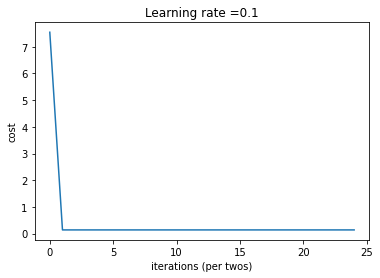

Parameters have been trained!
Train Accuracy: 0.10441667



For alpha = 0.3
Cost after epoch 0: 315.861135
Cost after epoch 10: 0.138182
Cost after epoch 20: 0.138190
Cost after epoch 30: 0.138229
Cost after epoch 40: 0.138247


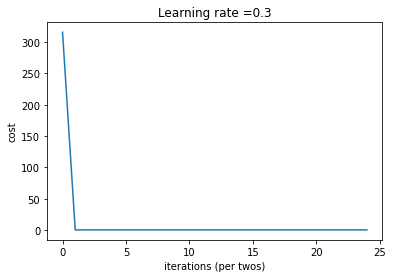

Parameters have been trained!
Train Accuracy: 0.10441667





In [197]:
alpha = [0.0001, 0.0003, 0.001, 0.003, 0.1, 0.3];

for i in alpha:
    print("For alpha =",i)
    _ = model(X_train , Y_train,alpha = i, cost_type = "softmax_cross_entropy",optim ='adam',num_epochs=50)

This suggests that at alpha = 0.001, the learning rate works optimally!

Cost after epoch 0: 0.041566
Cost after epoch 10: 0.041559
Cost after epoch 20: 0.041559
Cost after epoch 30: 0.041559
Cost after epoch 40: 0.041559


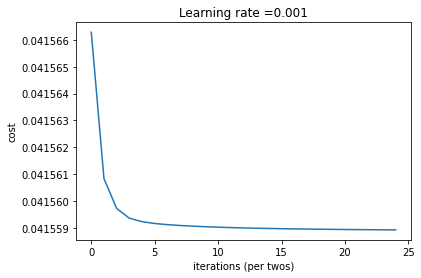

Parameters have been trained!
Train Accuracy: 0.8979333



Cost after epoch 0: 0.044167
Cost after epoch 10: 0.001175
Cost after epoch 20: 0.000189
Cost after epoch 30: 0.000016
Cost after epoch 40: 0.000008


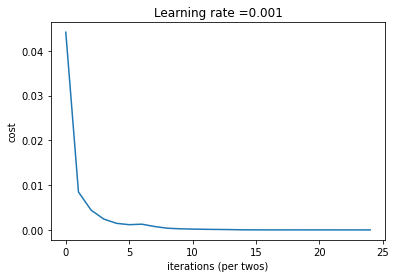

Parameters have been trained!
Train Accuracy: 1.0





In [198]:
_=  model(X_train, Y_train, alpha = 0.001, cost_type = "sigmoid_cross_entropy", optim ='adam',num_epochs = 50)

_=  model(X_train, Y_train, alpha = 0.001, cost_type = "softmax_cross_entropy",optim ='adam',num_epochs = 50)


Softmax cross entropy works very well with the model!

Cost after epoch 0: 0.169701
Cost after epoch 10: 0.037237
Cost after epoch 20: 0.028494
Cost after epoch 30: 0.024442
Cost after epoch 40: 0.021909


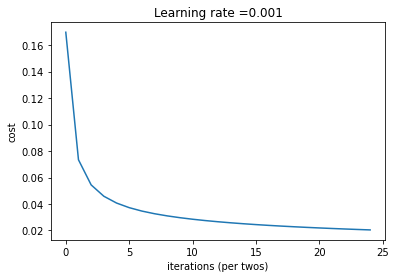

Parameters have been trained!
Train Accuracy: 0.8976167



Cost after epoch 0: 0.090978
Cost after epoch 10: 0.006570
Cost after epoch 20: 0.003508
Cost after epoch 30: 0.002170
Cost after epoch 40: 0.001410


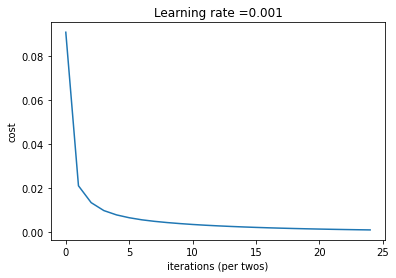

Parameters have been trained!
Train Accuracy: 0.9978833



Cost after epoch 0: 0.044167
Cost after epoch 10: 0.001175
Cost after epoch 20: 0.000189
Cost after epoch 30: 0.000016
Cost after epoch 40: 0.000008


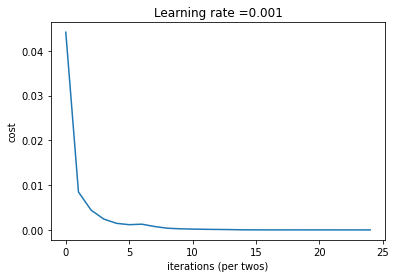

Parameters have been trained!
Train Accuracy: 1.0





In [199]:
_ =  model(X_train, Y_train, alpha = 0.001, num_epochs = 50, cost_type = "softmax_cross_entropy",
                    optim ='gradientdescent')

_ =  model(X_train, Y_train, alpha = 0.001, num_epochs = 50, cost_type = "softmax_cross_entropy",
                    optim ='momentum')

_ =  model(X_train, Y_train, alpha = 0.001, num_epochs = 50, cost_type = "softmax_cross_entropy",
                    optim ='adam')

Adam optimiser works very well with the model!

Lets check the number of iteration by which the model gets almost trained and will not overfit.

For number of epoch = 10
Cost after epoch 0: 0.044167


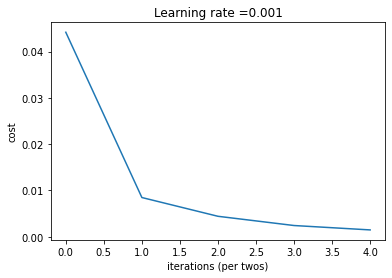

Parameters have been trained!
Train Accuracy: 0.99046665



For number of epoch = 15
Cost after epoch 0: 0.044167
Cost after epoch 10: 0.001175


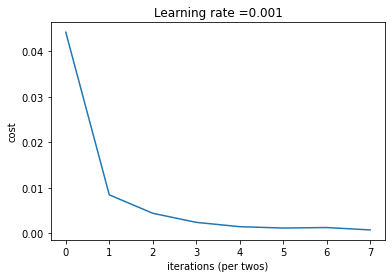

Parameters have been trained!
Train Accuracy: 0.9946



For number of epoch = 20
Cost after epoch 0: 0.044167
Cost after epoch 10: 0.001175


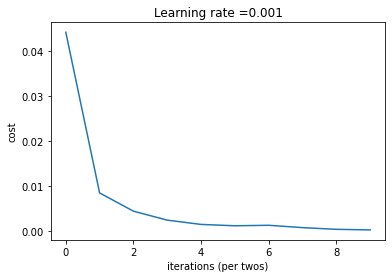

Parameters have been trained!
Train Accuracy: 0.9993167



For number of epoch = 25
Cost after epoch 0: 0.044167
Cost after epoch 10: 0.001175
Cost after epoch 20: 0.000189


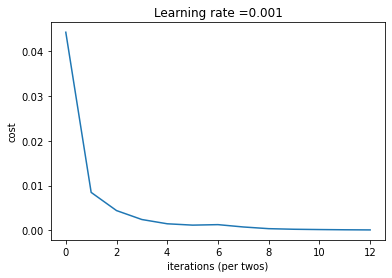

Parameters have been trained!
Train Accuracy: 0.99946666



For number of epoch = 30
Cost after epoch 0: 0.044167
Cost after epoch 10: 0.001175
Cost after epoch 20: 0.000189


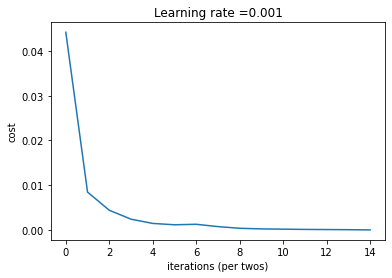

Parameters have been trained!
Train Accuracy: 1.0



For number of epoch = 35
Cost after epoch 0: 0.044167
Cost after epoch 10: 0.001175
Cost after epoch 20: 0.000189
Cost after epoch 30: 0.000016


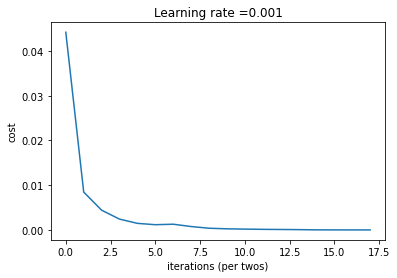

Parameters have been trained!
Train Accuracy: 1.0



For number of epoch = 40
Cost after epoch 0: 0.044167
Cost after epoch 10: 0.001175
Cost after epoch 20: 0.000189
Cost after epoch 30: 0.000016


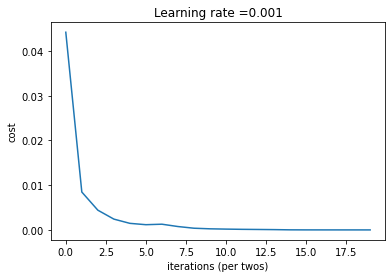

Parameters have been trained!
Train Accuracy: 1.0





In [200]:
n = [10, 15, 20, 25, 30, 35, 40]

for i in n:
    print("For number of epoch =",i)
    _= model(X_train, Y_train, alpha = 0.001, cost_type='softmax_cross_entropy', optim = 'adam',
                  num_epochs = i)

The model will over fit after almost 30 epochs.

So lets combine all of them together and train the parameters!!

Cost after epoch 0: 0.044167
Cost after epoch 10: 0.001175
Cost after epoch 20: 0.000189


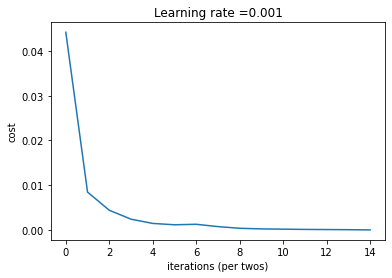

Parameters have been trained!
Train Accuracy: 1.0





In [206]:
parameters = model(X_train, Y_train, alpha = 0.001, cost_type='softmax_cross_entropy', optim = 'adam',num_epochs = 30)

In [207]:
y_pred = predict(X_test, Y_test, parameters)


Test Accuracy: 0.9771


y = 2


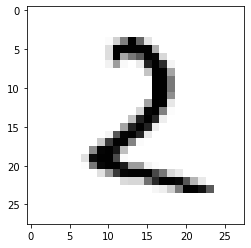

In [203]:
ind = np.random.randint(0,10000)
plt.imshow(X_test[:,ind].reshape(28,28), cmap = 'Greys')
print("y =",y_pred[ind])